In [1]:
import numpy as np
import networkx as nx
from matplotlib import pyplot as plt

---
#### 1. Считаем граф из файла в формате GraphML 

In [2]:
### insert path to your graph
path = './example2.graphml'

G = nx.read_graphml(path)

---
#### 2. Вычислим корень дерева

In [3]:
start_node = list(filter(lambda x: x[1] == 0, dict(G.in_degree()).items()))[0][0]
start_node

'n0'

---
#### 3. Присвоим вершинам координаты алгоритмом Layered-Tree-Draw 

In [4]:
attrs = {}

def in_order(G, node, depth=0, cnt=0):
    neighbors = list(G.neighbors(node))
    
    # посещаем первую половину детей
    for i in range(len(neighbors) // 2):
        cnt = in_order(G, neighbors[i], depth + 1, cnt)
    
    # задаем координаты вершины
    attrs[node] = {'y': depth, 'x': cnt}
    cnt += 1
    
    # посещаем вторую половину детей
    for i in range(len(neighbors) // 2, len(neighbors)):
        cnt = in_order(G, neighbors[i], depth + 1, cnt)
        
    return cnt

In [5]:
in_order(G, start_node)
nx.set_node_attributes(G, attrs)

---
#### 4. Приступим к отрисовке графа

In [11]:
def draw_graph(G, title=None):
    x = [G.nodes[node]['x'] for node in G.nodes]
    y = [G.nodes[node]['y'] for node in G.nodes]
    
    plt.figure(figsize=(15, 8))
    plt.gca().invert_yaxis()
    plt.scatter(x, y, s=150)
    for a, b in G.edges:
        plt.plot([G.nodes[a]['x'], G.nodes[b]['x']], [G.nodes[a]['y'], G.nodes[b]['y']], color='blue')
        
    if not title is None:
        plt.title(title, fontsize=24)
        
    plt.ylabel('node depth', fontsize=16)
    plt.savefig('result.png', format='png')
    plt.show()

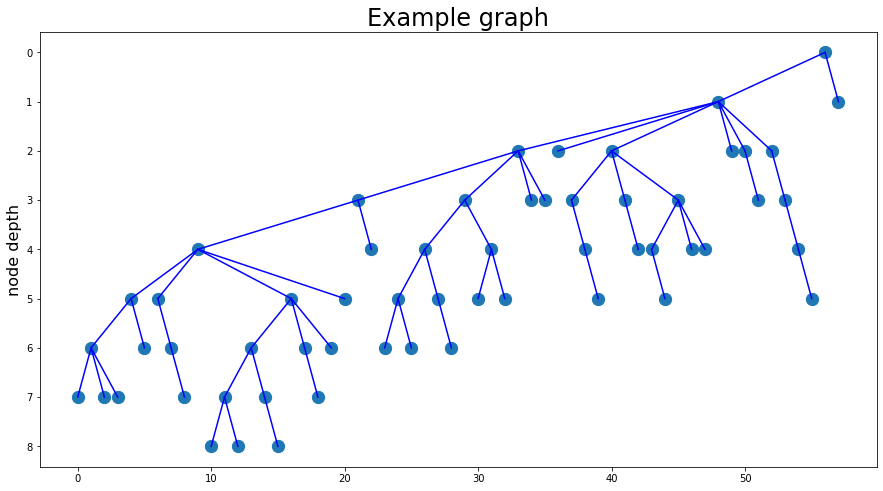

In [12]:
draw_graph(G, title='Example graph')